# Assignment #3, Introduction to Python:

1. Simulate bacterial population size data that follows an exponential growth.

a. Set the initial population, 100, in a variable named `N0`. The growth rate, `rate`, is 0.4. (0.5 marks)   
b. Use the suitable numpy function to generate an array of time points from 0 to 10 seconds, in 0.2 second increments and store the result in a variable called `t`. (0.5 marks)  
c. In a variable named `population_size`, calculate the population of the colony at the time points in t, using the exponential growth function.    
    Reminder, the formula for exponential growth is:

population_size = $ N_0e^{rt} $

where e is the exponential function (in Python, Numpy has an exponentioal function to calculate this), `r` is the rate, and `t` is time. Print `population_size`, it output should be an array of bacterial population size for each time point in `t`. (1 mark)

d. In a a new variable called `population_size_noise`, use the same expression you wrote in (c), and add noise to the population at each time point. Do this by adding an expression that generates a random value for each time point drawn from a normal distribution of `mean=0` and `stdev 250`. Try using the Numpy function for normal distribution. It should look something like:

        population_size_noise = expression_from_part_a + expression_to_add_noise
       
(1 mark)

2. Let's assume we don't know the rate of the population growth, but we do have the data of the population size across time. Using the data you simulated in `population_size_noise`, estimate the rate by iterating over a range of parameter values and choosing the one with the best fit to the data.  
    a. In a variable called `range_rate`, define a range of parameters to try from 0.1, up to and including 1, of step size 0.1 (0.5 marks)  
    b. Write a function called `squared_error` to take the predicted data from a given growth rate, and the observed data to evaluate quality of the fit. It should take two parameters, and return one value, the mean squared error:  
        Input arguments  
        - prediction: an array of the predicted data  
        - data: an array of the observed data  
        Output arguments  
        - mse: a float containing the calculated mean square error
    
    Fill in the blanks with the missing code to complete this question, (i.e. remove all ___ with your code) (1 mark)
    ```
    def _____(_____):
        residual = _____ # the difference between our prediction and data
        mse = _____ # use the residual to calculate the mean squared error
        _____ # return the result
    ```
    c. Now that we have a way to test the fit of our estimation, use the function we wrote in (b) to iterate over `range_rate` to find the value with the smallest error.
    Fill in the blanks with the missing code to complete this question, (i.e. remove all ___ with your code) (1.5 marks)

    ```
    mse = [] # initialize a list to store our results
    for _____ in _____:
        prediction = _____
        error = _____
        mse._____(_____)

    # find the index of the minimum value in mse
    idx_min_mse = _____
    # use the index of the min value in mse to obtain the corresponding rate
    # remember the arrays are the same size, and generated in order when iterating over range_rates
    best_fit = _____

    print('We predict the rate of growth of this bacterial population to be',best_fit)
    ```
    
**remember that your code should be fully commented meaning that every section and line should be preceded by a comment that describes what the next line performs**

## Answer

In [1]:
import numpy as np

In [3]:
# 1 
# define parameters
rate = 0.4
N0 = 100

# generate the time data
t = np.arange(0,10.2,0.2)
population_size = N0*np.exp(rate*t) + np.random.normal(0,250,len(t))
population_size[0] = 100
population_size

array([ 100.        ,  374.83302561,  399.97091053,  386.46432581,
         58.58829079,    9.4054881 ,  254.9299076 ,  335.74586606,
       -303.40148145,  231.7345187 ,  273.49869733,  338.20750633,
        618.46529361,  418.63453388,  370.95411672,  635.6625624 ,
        199.42227256,  510.04532998,   74.26147877,  846.02227328,
        874.95937381,  250.06910067,  536.74865455,  652.18621041,
        363.63702546,  988.90073634, 1009.58197605, 1384.67956341,
         73.7155332 , 1234.28723377,  821.73460414,  990.37875286,
       1240.55447709, 1571.43014844, 1631.47538509, 2328.64465172,
       1518.5468463 , 1891.35945427, 2221.44186125, 2279.33845543,
       2545.35704972, 2113.98424266, 2815.51746981, 3220.95646455,
       3121.98445994, 3520.99936815, 3963.72418182, 4142.4198335 ,
       4495.10208983, 4741.92752815, 5413.7472368 ])

In [4]:
# 2
# define the range of parameters to try
range_rate = np.arange(0.1, 1, 0.1)

# define a function that calcualates mean squared error
def squared_error(prediction,data):
    residual = prediction - data
    mse = (residual**2).mean()          #or np.sum(residual**2)
    return mse

# try the parameters and choose the one with the least squared error
mse = []
for r in range_rate:
    prediction = N0*np.exp(r*t)
    mse.append(squared_error(prediction,population_size))

best_fit = range_rate[np.argmin(mse)]
print('We predict the rate of growth of this bacterial population to be',best_fit)
    

We predict the rate of growth of this bacterial population to be 0.4


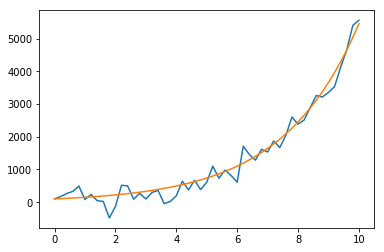

In [69]:
# Only for showing in the class (not required of students)
best_prediction = N0*np.exp(best_fit*t)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t,population_size);
plt.plot(t,best_prediction);